In [1]:
from mpl_toolkits.mplot3d import Axes3D         # Cargo Axes3D de mpl_toolkits.mplot3d
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import pandas as pd
%matplotlib inline

from scipy.spatial.distance import pdist

# Fuerza Bruta

In [2]:
datos  = pd.read_csv('/home/echeveste/mis_trabajos/correlation_f_2/datos/dat_glx/data_10K.dat', sep = ' ', header=None)
aleat = pd.read_csv('/home/echeveste/mis_trabajos/correlation_f_2/datos/dat_glx/rand0_10K.dat',sep = ' ', header=None)

número de datos:  10000
número de datos random:  10000


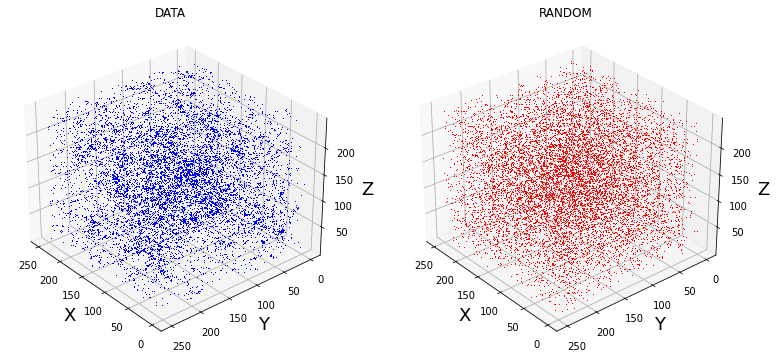

In [3]:
print('número de datos: ', len(datos[0]))
print('número de datos random: ', len(aleat[0]))

fig = plt.figure(figsize=(13,6))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot3D(datos[0],datos[1],datos[2],',b')
ax.set_xlabel('X',fontsize=18)
ax.set_ylabel('Y',fontsize=18)
ax.set_zlabel('Z',fontsize=18)
plt.title('DATA')
ax.view_init(30, 140)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot3D(aleat[0],aleat[1],aleat[2],',r')
ax.set_xlabel('X',fontsize=18)
ax.set_ylabel('Y',fontsize=18)
ax.set_zlabel('Z',fontsize=18)
plt.title('RANDOM')
ax.view_init(30, 140)

plt.show()

In [113]:
# Pasamos los datos a un array numpy
dat = np.array(datos.T[0:3].T)
ran = np.array(aleat.T[0:3].T)

In [114]:
d_max = 30
l = 250

In [115]:
data = dat

ext = []

for i in range(3):
    front = data[(data[:,i]<d_max)]
    front[:,i] += l
    ext.append(front)
    
    front = data[(data[:,i]>l-d_max)]
    front[:,i]  -= l
    ext.append(front)

for i in range(3):
    for j in range(3):
        if i<j:
            front = data[(data[:,i]<d_max)&(data[:,j]<d_max)]
            front[:,i]  += l
            front[:,j]  += l
            ext.append(front)
            
            front = data[(data[:,i]>l-d_max)&(data[:,j]>l-d_max)]
            front[:,i]  -= l
            front[:,j]  -= l
            ext.append(front)
            
            front = data[(data[:,i]<d_max)&(data[:,j]>l-d_max)]
            front[:,i]  += l
            front[:,j]  -= l
            ext.append(front)
            
            front = data[(data[:,i]>l-d_max)&(data[:,j]<d_max)]
            front[:,i]  -= l
            front[:,j]  += l
            ext.append(front)

front = data[(data[:,0]<d_max)&(data[:,1]<d_max)&(data[:,2]<d_max)]
front[:,0]  += l
front[:,1]  += l
front[:,2]  += l
ext.append(front)

front = data[(data[:,0]<d_max)&(data[:,1]<d_max)&(data[:,2]>l-d_max)]
front[:,0]  += l
front[:,1]  += l
front[:,2]  -= l
ext.append(front)

front = data[(data[:,0]<d_max)&(data[:,1]>l-d_max)&(data[:,2]<d_max)]
front[:,0]  += l
front[:,1]  -= l
front[:,2]  += l
ext.append(front)

front = data[(data[:,0]>l-d_max)&(data[:,1]<d_max)&(data[:,2]<d_max)]
front[:,0]  -= l
front[:,1]  += l
front[:,2]  += l
ext.append(front)

front = data[(data[:,0]<d_max)&(data[:,1]>l-d_max)&(data[:,2]>l-d_max)]
front[:,0]  += l
front[:,1]  -= l
front[:,2]  -= l
ext.append(front)

front = data[(data[:,0]>l-d_max)&(data[:,1]<d_max)&(data[:,2]>l-d_max)]
front[:,0]  -= l
front[:,1]  += l
front[:,2]  -= l
ext.append(front)

front = data[(data[:,0]>l-d_max)&(data[:,1]>l-d_max)&(data[:,2]<d_max)]
front[:,0]  -= l
front[:,1]  -= l
front[:,2]  += l
ext.append(front)

front = data[(data[:,0]>l-d_max)&(data[:,1]>l-d_max)&(data[:,2]>l-d_max)]
front[:,0]  -= l
front[:,1]  -= l
front[:,2]  -= l
ext.append(front)
ext = np.concatenate(ext)
len(ext)

9335

In [116]:
dat_f = np.unique(np.concatenate([ext,dat]) +30 , axis=0)

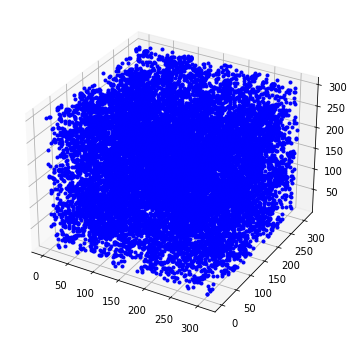

In [117]:
fig = plt.figure(figsize=(13,6))

ax = fig.add_subplot(1, 2, 1, projection='3d')
#ax.plot3D(dat[:,0],dat[:,1],dat[:,2],',y')
#ax.plot3D(ext[:,0],ext[:,1],ext[:,2],'.b')
ax.plot3D(dat_f[:,0],dat_f[:,1],dat_f[:,2],'.b')
#ax.view_init(270, 0)

In [118]:
data = ran

ext = []

for i in range(3):
    front = data[(data[:,i]<d_max)]
    front[:,i] += l
    ext.append(front)
    
    front = data[(data[:,i]>l-d_max)]
    front[:,i]  -= l
    ext.append(front)
    
for i in range(3):
    for j in range(3):
        if i<j:
            front = data[(data[:,i]<d_max)&(data[:,j]<d_max)]
            front[:,i]  += l
            front[:,j]  += l
            ext.append(front)
            
            front = data[(data[:,i]>l-d_max)&(data[:,j]>l-d_max)]
            front[:,i]  -= l
            front[:,j]  -= l
            ext.append(front)
            
            front = data[(data[:,i]<d_max)&(data[:,j]>l-d_max)]
            front[:,i]  += l
            front[:,j]  -= l
            ext.append(front)
            
            front = data[(data[:,i]>l-d_max)&(data[:,j]<d_max)]
            front[:,i]  -= l
            front[:,j]  += l
            ext.append(front)

front = data[(data[:,0]<d_max)&(data[:,1]<d_max)&(data[:,2]<d_max)]
front[:,0]  += l
front[:,1]  += l
front[:,2]  += l
ext.append(front)

front = data[(data[:,0]<d_max)&(data[:,1]<d_max)&(data[:,2]>l-d_max)]
front[:,0]  += l
front[:,1]  += l
front[:,2]  -= l
ext.append(front)

front = data[(data[:,0]<d_max)&(data[:,1]>l-d_max)&(data[:,2]<d_max)]
front[:,0]  += l
front[:,1]  -= l
front[:,2]  += l
ext.append(front)

front = data[(data[:,0]>l-d_max)&(data[:,1]<d_max)&(data[:,2]<d_max)]
front[:,0]  -= l
front[:,1]  += l
front[:,2]  += l
ext.append(front)

front = data[(data[:,0]<d_max)&(data[:,1]>l-d_max)&(data[:,2]>l-d_max)]
front[:,0]  += l
front[:,1]  -= l
front[:,2]  -= l
ext.append(front)

front = data[(data[:,0]>l-d_max)&(data[:,1]<d_max)&(data[:,2]>l-d_max)]
front[:,0]  -= l
front[:,1]  += l
front[:,2]  -= l
ext.append(front)

front = data[(data[:,0]>l-d_max)&(data[:,1]>l-d_max)&(data[:,2]<d_max)]
front[:,0]  -= l
front[:,1]  -= l
front[:,2]  += l
ext.append(front)

front = data[(data[:,0]>l-d_max)&(data[:,1]>l-d_max)&(data[:,2]>l-d_max)]
front[:,0]  -= l
front[:,1]  -= l
front[:,2]  -= l
ext.append(front)
ext = np.concatenate(ext)

In [119]:
ran_f = np.unique(np.concatenate([ext,ran]) + 30,axis=0) 

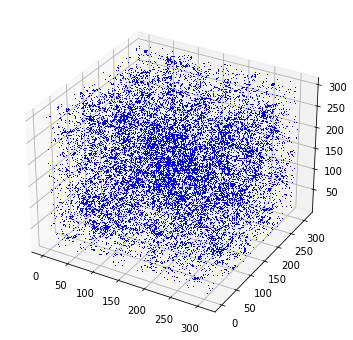

In [120]:
fig = plt.figure(figsize=(13,6))

ax = fig.add_subplot(1, 2, 1, projection='3d')
#ax.plot3D(ran[:,0],ran[:,1],ran[:,2],',y')
#ax.plot3D(ext[:,0],ext[:,1],ext[:,2],',b')
ax.plot3D(dat_f[:,0],dat_f[:,1],dat_f[:,2],',b')
#ax.view_init(270, 270)

# FB usando funciones de numpy

In [121]:
#FUNCIÓN DE PARA HACER HISTOGRAMAS 
def Histos(p,p_r,bn,point_max):
    """ 
    Función para construir los histogramas 
    
    p = datos
    p_r = random
    bn = tamaño de bins
    point_max = punto máximo en el histograma
    
    """
    
    #Inicializamos los arreglos de los histogramas
    NDD = np.zeros(bn)
    NRR = np.zeros(bn)
    NDR = np.zeros(bn)
    
    n = 0
    for ii in p:
        n = n+1
        
        # Histogramas para DD
        s = ii-p[n:] # Diferencia entre el punto pivote y los demas puntos siguientes 
        dis, r = np.histogram(np.sqrt(s[:,0]**2+s[:,1]**2+s[:,2]**2), bins=bn, range=(0, point_max))
        NDD += 2*dis
        
    n = 0
    for jj in p_r:
        n = n+1
        
        # Histogramas para RR
        s = jj-p_r[n:]
        dis, r = np.histogram(np.sqrt(s[:,0]**2+s[:,1]**2+s[:,2]**2), bins=bn, range=(0, point_max))
        NRR += 2*dis  
    
    for ii in p:
        # Histogramas para DR
        s = ii-p_r
        dis, r = np.histogram(np.sqrt(s[:,0]**2+s[:,1]**2+s[:,2]**2), bins=bn, range=(0, point_max))
        NDR += dis
    
    return r, NDD, NRR, NDR

In [107]:
#Función de correlación Landy-Szalay
def estim_LS(NDD, NRR, NDR):
    return (NDD - 2*NDR + NRR)/NRR

#def estim_LS(NDD, NRR, NDR, n, m, nm):
#    return 1 + (NDD*m)/(n*NRR) - 4*(NDR*m)/(nm*NRR)

In [108]:
#Función de correlación de Hamilton
def estim_HAM(NDD, NRR, NDR):
    return (NDD*NRR/NDR**2) - 1

#def estim_HAM(NDD, NRR, NDR, n, m, nm):
#    return (NDD*NRR*(nm**2))/((4*n*m)*NDR**2) - 1

In [122]:
start = time.perf_counter()

bins = 30
r, NDD, NRR, NDR = Histos(dat,ran,bins,30)

finish = time.perf_counter()

print(f'Finializó en {round(finish-start,2)} segundos')

Finializó en 4.27 segundos


In [123]:
NDD

array([  610.,  3352.,  4972.,  4812.,  4706.,  5012.,  5844.,  6786.,
        8144.,  9890., 11676., 13698., 15626., 17280., 19700., 21574.,
       23810., 25972., 27972., 30370., 33080., 36126., 38456., 40754.,
       44210., 48130., 50608., 53698., 57918., 60220.])

In [125]:
NRR

array([3.6000e+01, 1.7400e+02, 5.1600e+02, 1.0080e+03, 1.4860e+03,
       2.2760e+03, 3.2520e+03, 4.2540e+03, 5.4640e+03, 7.0360e+03,
       8.4620e+03, 9.8200e+03, 1.1878e+04, 1.3636e+04, 1.5494e+04,
       1.7708e+04, 2.0058e+04, 2.2150e+04, 2.4686e+04, 2.7126e+04,
       2.9870e+04, 3.2708e+04, 3.5454e+04, 3.8724e+04, 4.2384e+04,
       4.3918e+04, 4.8246e+04, 5.1814e+04, 5.5004e+04, 5.8746e+04])

In [126]:
NDR

array([2.6000e+01, 1.8900e+02, 5.3200e+02, 9.6700e+02, 1.6470e+03,
       2.3550e+03, 3.1950e+03, 4.3230e+03, 5.4910e+03, 6.8150e+03,
       8.4160e+03, 9.7510e+03, 1.1359e+04, 1.3386e+04, 1.5515e+04,
       1.7573e+04, 1.9613e+04, 2.1789e+04, 2.4704e+04, 2.7128e+04,
       2.9705e+04, 3.2318e+04, 3.5212e+04, 3.8325e+04, 4.1376e+04,
       4.4246e+04, 4.7963e+04, 5.1277e+04, 5.4863e+04, 5.8502e+04])

In [15]:
np.savetxt('/home/echeveste/mis_trabajos/correlation_f/mis_datos/FB/all/DD_isofull_osc.dat',NDD )
np.savetxt('/home/echeveste/mis_trabajos/correlation_f/mis_datos/FB/all/RR_isofull_osc.dat',NRR )
np.savetxt('/home/echeveste/mis_trabajos/correlation_f/mis_datos/FB/all/DR_isofull_osc.dat',NDR )

In [43]:
eps_LS = estim_LS(NDD, NRR, NDR)
eps_HAM = estim_HAM(NDD, NRR, NDR)

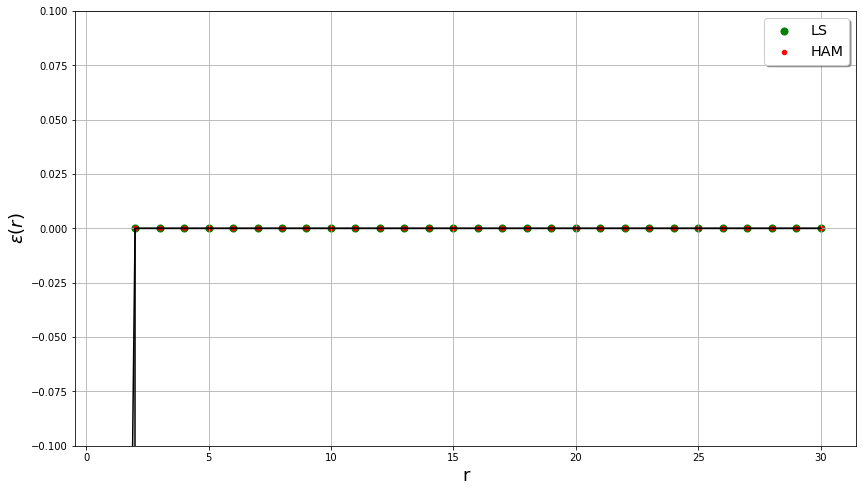

In [44]:
fig = plt.figure(figsize=(14,8))
plt.scatter(r[1:],eps_LS, s=50, c='g',label='LS')
plt.scatter(r[1:],eps_HAM, s=20, c='r',label='HAM')
plt.plot(r[1:],eps_LS,'k-')
plt.plot(r[1:],eps_HAM,'k-')
plt.ylim(-0.1,0.1)
plt.xlabel('r',fontsize=18)
plt.ylabel('$\epsilon(r)$',fontsize=18)
plt.legend(shadow=True, fontsize='x-large')
plt.grid();

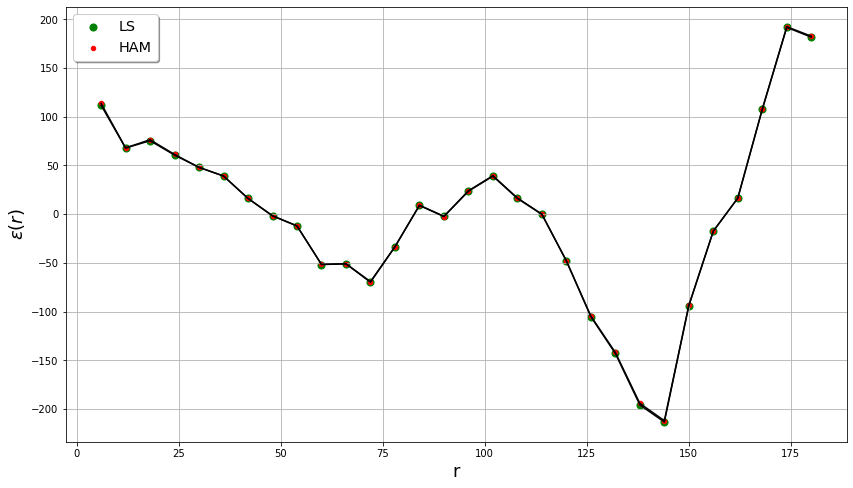

In [18]:
fig = plt.figure(figsize=(14,8))
#plt.scatter(r[1:],r[1:]**2*eps_PH, s=50, c='b',label='PH')
plt.scatter(r[1:],r[1:]**2*eps_LS, s=50, c='g',label='LS')
plt.scatter(r[1:],r[1:]**2*eps_HAM, s=20, c='r',label='HAM')
#plt.plot(r[1:],r[1:]**2*eps_PH,'k-')
plt.plot(r[1:],r[1:]**2*eps_LS,'k-')
plt.plot(r[1:],r[1:]**2*eps_HAM,'k-')
plt.xlabel('r',fontsize=18)
plt.ylabel('$\epsilon(r)$',fontsize=18)
plt.legend(shadow=True, fontsize='x-large')
plt.grid();

# FB con Anisotropia (eje z como linea de observacion)

In [66]:
data  = pd.read_csv('/home/echeveste/Mis_trabajos/correlation_f/data/data.dat', sep = ' ', header=None)
rand0 = pd.read_csv('/home/echeveste/Mis_trabajos/correlation_f/data/rand0.dat',sep = ' ', header=None)

In [67]:
# Pasamos los datos a un array numpy
data = np.array(data.T[0:3].T)
rand = np.array(rand0.T[0:3].T)

In [68]:
def Histos_ani(p,p_r,bn,point_max):
    
    """ 
    Función para construir los histogramas en 2D con anisotropia
    
    p = datos
    p_r = random
    bn = tamaño de bins
    point_max = punto máximo en el histograma
    
    """
    
    # Iniciamos los arreglos los histogramas 
    NDD = np.zeros((bn,bn))
    NRR = np.zeros((bn,bn))
    NDR = np.zeros((bn,bn))
    
    n = 0
    for (ii, jj) in zip(p, p_r):
        n = n+1
        
        #DD
        s = ii-p[n:] # vectores diferencia entre dos puntos
        r_ort = np.sqrt(s[:,0]**2+s[:,1]**2)
        r_pll = np.abs(ii[2]-p[n:,2])
        
        #Hacemos los histogramas para estas distancias 
        dis, x,y = np.histogram2d(r_pll, r_ort, bins=[bn,bn], range=([[0, point_max], [0, point_max]]))
        NDD = NDD + 2*dis
        
        #RR
        s = jj-p_r[n:] # vectores diferencia entre dos puntos
        r_ort = np.sqrt(s[:,0]**2+s[:,1]**2)
        r_pll = np.abs(jj[2]-p_r[n:,2])
        dis, x,y = np.histogram2d(r_pll, r_ort, bins=[bn,bn], range=([[0, point_max], [0, point_max]]))
        NRR = NRR + 2*dis
    
    
    for ii in p:
        s = ii-p_r # vectores diferencia entre dos puntos
        r_ort = np.sqrt(s[:,0]**2+s[:,1]**2)
        r_pll = np.abs(ii[2]-p_r[:,2])
        dis, x,y  = np.histogram2d(r_pll, r_ort, bins=[bn,bn], range=([[0, point_max], [0, point_max]]))
        NDR = NDR + dis
          
    
    return  NDD, NRR, NDR, x, y

In [69]:
start = time.perf_counter()

bins = 30
NDD_2d, NRR_2d, NDR_2d, xx, yy = Histos_ani(data,rand,bins,180)

finish = time.perf_counter()

print(f'Finializó en {round(finish-start,2)} segundos')

Finializó en 159.07 segundos


In [83]:
np.savetxt('/home/echeveste/Mis_trabajos/correlation_f/mis_datos/FB/all/DD_anifull_osc.dat',NDD_2d )
np.savetxt('/home/echeveste/Mis_trabajos/correlation_f/mis_datos/FB/all/RR_anifull_osc.dat',NRR_2d )
np.savetxt('/home/echeveste/Mis_trabajos/correlation_f/mis_datos/FB/all/DR_anifull_osc.dat',NDR_2d )

In [71]:
eps_LS_2d = estim_LS(NDD_2d,NRR_2d,NDR_2d)
eps_HAM_2d = estim_HAM(NDD_2d, NRR_2d, NDR_2d)

In [72]:
def imag(x,y,t,cmap,limt):
    
    u = np.linspace(0,180,1000)
    v = u
    
    plt.figure(figsize=(6,6), dpi=100)
    plt.imshow(x,origin='lower',cmap=cmap, extent=[0,180,0,180],
               interpolation= 'bilinear', vmin=-limt, vmax=limt)
    cax=plt.colorbar()
    plt.contour(x,10,cmap=plt.cm.gray,linewidths=1
                ,extent=[0,180,0,180],vmin=-limt, vmax=limt)
    plt.plot(u,v,'')
    plt.scatter(100,100)
    plt.ylabel('$r_{\pi}$',fontsize = 16)
    plt.xlabel('$r_{p}$',fontsize = 16)
    plt.title(y,fontsize = 16)
    plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
    cax.set_label(t,labelpad = 15,fontsize = 15)
    line_colour1 = ('royalblue', 'blue', 'mediumblue', 'darkblue')
    plt.plot()

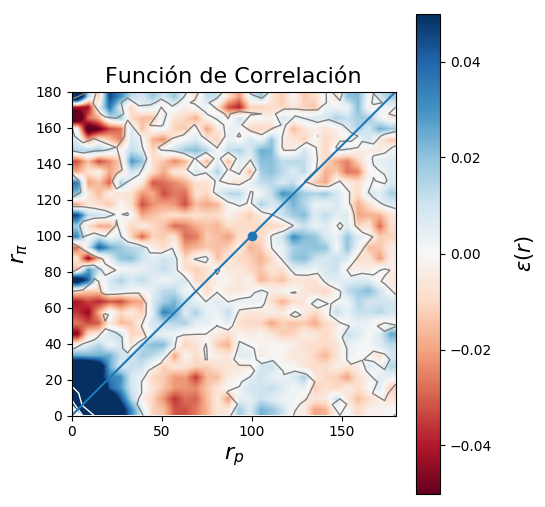

In [65]:
limt=0.05
imag(eps_LS_2d,'Función de Correlación','$\epsilon(r)$',cmap='RdBu', limt=limt)

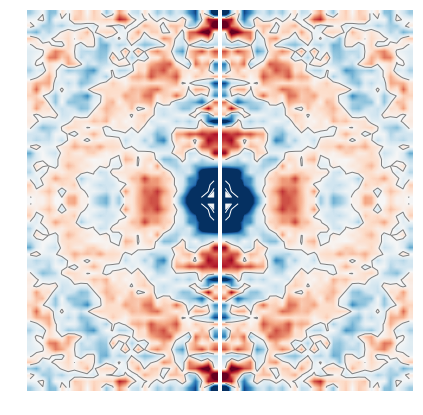

In [57]:
import scipy.misc
from scipy import ndimage
import matplotlib.gridspec as gridspec

plt.figure(figsize = (7,7))
gs1 = gridspec.GridSpec(2, 2)
gs1.update(wspace=0.0, hspace=0.0) # set the spacing between axes. 

ax1 = plt.subplot(gs1[0])
rotated_img = ndimage.rotate(np.rot90(eps_LS_2d), 90)
plt.imshow(rotated_img, cmap='RdBu',interpolation= 'bilinear', vmin=-limt, vmax=limt)
plt.contour(rotated_img,10,cmap=plt.cm.gray,linewidths=1, vmin=-limt, vmax=limt)
plt.axis('off')
ax1 = plt.subplot(gs1[1])
rotated_img = ndimage.rotate(eps_LS_2d.T,90)
plt.imshow(rotated_img, cmap='RdBu',interpolation= 'bilinear', vmin=-limt, vmax=limt)
plt.contour(rotated_img,10,cmap=plt.cm.gray,linewidths=1, vmin=-limt, vmax=limt)
plt.axis('off')
ax1 = plt.subplot(gs1[2])
rotated_img = ndimage.rotate(eps_LS_2d.T,-90)
plt.imshow(rotated_img, cmap='RdBu',interpolation= 'bilinear', vmin=-limt, vmax=limt)
plt.contour(rotated_img,10,cmap=plt.cm.gray,linewidths=1, vmin=-limt, vmax=limt)
plt.axis('off')
ax1 = plt.subplot(gs1[3])
rotated_img = ndimage.rotate(eps_LS_2d, 0)
plt.imshow(rotated_img, cmap='RdBu',interpolation= 'bilinear', vmin=-limt, vmax=limt)
plt.contour(rotated_img,10,cmap=plt.cm.gray,linewidths=1, vmin=-limt, vmax=limt)
plt.axis('off')
plt.show()

# FB con Anisotropia (punto medio como linea de observacion)

In [720]:
def Histos_ani_2(p,p_r,bn,point_max):
    
    """ 
    Función para construir los histogramas en 2D con anisotropia
    
    p = datos
    p_r = random
    bn = tamaño de bins
    point_max = punto máximo en el histograma
    
    """
    
    # Punto de observación
    pm = np.array([125,125,1000000])
    
    # Iniciamos los arreglos los histogramas 
    NDD = np.zeros((bn,bn))
    NRR = np.zeros((bn,bn))
    NDR = np.zeros((bn,bn))
    
    n = 0
    for (ii, jj) in zip(p, p_r):
        n = n+1
        
        #DD
        m = ((ii+p[n:])/2) - pm # puntos medios entre dos puntos 
        s = ii-p[n:] # vectores diferencia entre dos puntos
        rab = np.sqrt(s[:,0]**2+s[:,1]**2+s[:,2]**2) # distancias entre dos puntos
        m = (m.T/np.sqrt(m[:,0]**2+m[:,1]**2+m[:,2]**2)).T #Tomamos el vector unitario del punto medio
        
        #Hacemos el producto punto entre m y s para distancia perpendicular 
        matrx = np.multiply(m,s) 
        r_pll = matrx[:,0] + matrx[:,1] + matrx[:,2] #distancia perpendicular 
        
        r_ort = np.sqrt(rab**2 - r_pll**2) # Distancais ortogonales
        
        #Hacemos los histogramas para estas distancias 
        dis, x,y = np.histogram2d(r_pll, r_ort, bins=bn, range=([[0, point_max], [0, point_max]]))
        NDD = NDD + 2*dis
        
        #RR
        m = ((jj+p_r[n:])/2) - pm
        s = jj-p_r[n:]
        rab = np.sqrt((s[:,0]**2)+(s[:,1]**2)+(s[:,2]**2))
        m = (m.T/np.sqrt((m[:,0]**2)+(m[:,1]**2)+(m[:,2]**2))).T
        matrx = np.multiply(m,s)
        r_pll = matrx[:,0] + matrx[:,1] + matrx[:,2]
        r_ort = np.sqrt(rab**2 - r_pll**2)
        dis, x,y = np.histogram2d(r_pll, r_ort, bins=bn, range=([[0, point_max], [0, point_max]]))
        NRR = NRR + 2*dis
    
    for ii in p:
        m = ((ii+p_r)/2) - pm
        s = ii-p_r
        rab = np.sqrt((s[:,0]**2)+(s[:,1]**2)+(s[:,2]**2))
        m = (m.T/np.sqrt((m[:,0]**2)+(m[:,1]**2)+(m[:,2]**2))).T
        matrx = np.multiply(m,s)
        r_pll = matrx[:,0] + matrx[:,1] + matrx[:,2]
        r_ort = np.sqrt(rab**2 - r_pll**2)
        dis, x,y  = np.histogram2d(r_pll, r_ort, bins=bn, range=([[0, point_max], [0, point_max]]))
        NDR = NDR + dis
          
    
    return  NDD, NRR, NDR, x, y

In [721]:
start = time.perf_counter()

bins = 30
NDD_2d_2, NRR_2d_2, NDR_2d_2, xx_2, yy_2 = Histos_ani_2(data,rand,bins,180)

finish = time.perf_counter()

print(f'Finializó en {round(finish-start,2)} segundos')

Finializó en 203.73 segundos


In [767]:
eps_LS_2d_2 = estim_LS(NDD_2d_2,NRR_2d_2,NDR_2d_2)
eps_HAM_2d_2 = estim_HAM(NDD_2d_2, NRR_2d_2, NDR_2d_2)

In [768]:
top = np.max(eps_LS_2d_2[np.where(eps_LS_2d_2 < 0.3)])
#down = np.min(eps_LS_2d_2[np.where(eps_LS_2d_2 > -0.1)])
eps_LS_2d_2[np.where(eps_LS_2d_2 > 0.3)] = top
#eps_LS_2d_2[np.where(eps_LS_2d_2 < -0.1)] = down

In [769]:
p = 1
sig = 1

blur_OH = cv2.blur(eps_LS_2d_2,(p,p))

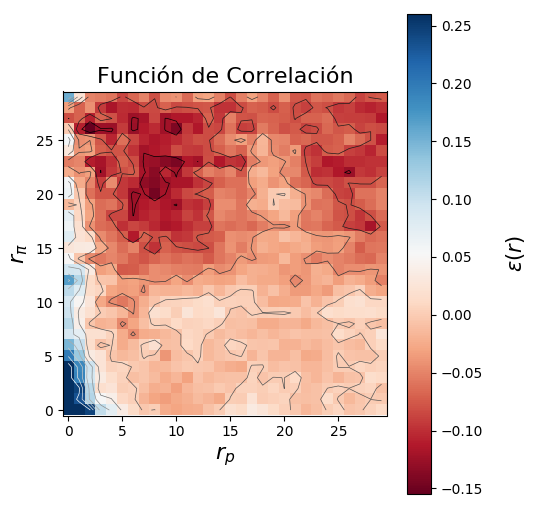

In [770]:
imag(blur_OH,'Función de Correlación','$\epsilon(r)$',cmap='RdBu')

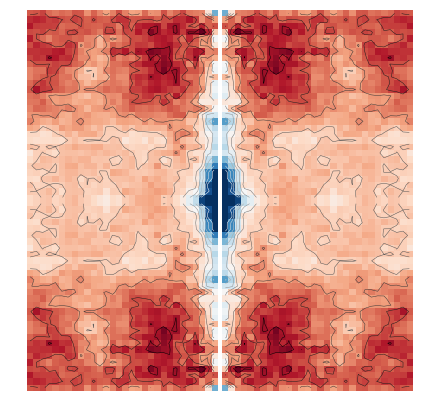

In [772]:
plt.figure(figsize = (7,7))
gs1 = gridspec.GridSpec(2, 2)
gs1.update(wspace=0.0, hspace=0.0) # set the spacing between axes. 

ax1 = plt.subplot(gs1[0])
rotated_img = ndimage.rotate(np.rot90(blur_OH), 90)
plt.imshow(rotated_img, cmap='RdBu')
plt.contour(rotated_img,10,cmap=plt.cm.gray,linewidths=0.5)
plt.axis('off')
ax1 = plt.subplot(gs1[1])
rotated_img = ndimage.rotate(blur_OH.T,90)
plt.imshow(rotated_img, cmap='RdBu')
plt.contour(rotated_img,10,cmap=plt.cm.gray,linewidths=0.5)
plt.axis('off')
ax1 = plt.subplot(gs1[2])
rotated_img = ndimage.rotate(blur_OH.T,-90)
plt.imshow(rotated_img, cmap='RdBu')
plt.contour(rotated_img,10,cmap=plt.cm.gray,linewidths=0.5)
plt.axis('off')
ax1 = plt.subplot(gs1[3])
rotated_img = ndimage.rotate(blur_OH, 0)
plt.imshow(rotated_img, cmap='RdBu')
plt.contour(rotated_img,10,cmap=plt.cm.gray,linewidths=0.5)
plt.axis('off')
plt.show()

In [80]:
data.T @ data

array([[6.88012002e+08, 5.12140607e+08, 5.08623321e+08],
       [5.12140607e+08, 6.75699644e+08, 5.07017828e+08],
       [5.08623321e+08, 5.07017828e+08, 6.66961417e+08]])